**Run all the cells below to make sure everything is working and ready to go. All cells should run without error.**

### Test Matplotlib and Plotting

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import math
%matplotlib inline
# import the libraries

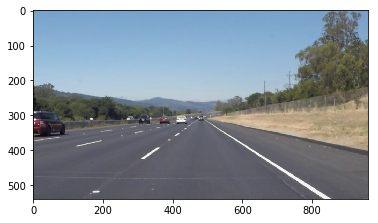

In [45]:
toprocess_img = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/SolidWhiteRight.jpg')
plt.imshow(toprocess_img)
#This is to test if the image library functions are working

In [46]:
def load_roads(path):
    imr=mpimg.imread(path)
    return imr

In [47]:
def grayscale(img):
    gs =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    return gs

# function to create a grayscale image

In [48]:
def gaussian_blur(img,kernal_size):
    return cv2.GaussianBlur(img,(kernal_size,kernal_size),0)

In [49]:
def canny(img,low_threshold,high_threshold):
    return cv2.Canny(img,low_threshold,high_threshold)

In [50]:
def region_of_interest(img,vertices):
    mask=np.zeros_like(img)
    #color_edges = np.dstack((edges, edges, edges))
    if len(img.shape) > 4:
        channel_count =img.shape[2]
        ignore_mask_color =(255,) * channel_count
    else:
        ignore_mask_color = 255
    
    cv2.fillPoly(mask,vertices,255)
    masked_edges=cv2.bitwise_and(img,mask)
    
    return masked_edges

In [51]:
def draw_lines(img,lines,color=[255,0,0],thickness=10):
    #for line in lines :
    #    for x1,y1,x2,y2 in line:
    #        cv2.line(img,(x1,y1),(x2,y2),color,thickness)
    Left_xArr=[]
    Left_yArr=[]
    Right_xArr=[]
    Right_yArr=[]
    img_xy=img.shape 
    imshape = [img_xy[0], img_xy[1]]  
    for line in lines:
        #print(line)
        for x1,y1,x2,y2 in line: 
            slope = float((y2-y1)/(x2-x1))
            #print("Slope",slope)
            if not np.isnan(slope) or np.isinf(slope) or (slope == 0):
                if (slope < -0.1) :
                    #print("Values",x1,y1,x2,y2,slope)
                    #left_slopes = np.append(left_slopes, slope)
                    #left_slope_count += 1
                    Left_xArr.append(x1)
                    Left_xArr.append(x2)
                    Left_yArr.append(y1)
                    Left_yArr.append(y2)
                if (slope > 0.2) :
                    #print("NPS")
                    #right_slopes = np.append(right_slopes, slope)
                    Right_xArr.append(x1)
                    Right_xArr.append(x2)
                    Right_yArr.append(y1)
                    Right_yArr.append(y2)
    para = np.polyfit(Right_xArr, Right_yArr,1)

    Right_X_min=min(Right_xArr)
    Right_X_max=max(Right_xArr)
    Right_Y_min=min(Right_yArr)
    Right_Y_max=max(Right_yArr)    
    Left_X_min=min(Left_xArr)
    Left_X_max=max(Left_xArr)
    Left_Y_min=min(Left_yArr)
    Left_Y_max=max(Left_yArr)    
    
    #print("Values",Left_X_min, Left_Y_min,Left_X_max, Left_Y_max)
    f = np.poly1d(para)

    cv2.line(img,(Right_X_min, Right_Y_min),(Right_X_max, Right_Y_max),(255,0,0),10)
    cv2.line(img,(Left_X_min, Left_Y_max),(Left_X_max, Left_Y_min),(255,0,0),10)   
    #cv2.line(img,(281,462 ),(487,304 ),(155,0,0),10)
           

In [52]:
def hough_lines(img,rho,theta,threshold,min_line_len,max_line_gap):
    lines =cv2.HoughLinesP(img,rho,theta,threshold,np.array([]),min_line_len,max_line_gap)
    print(lines)
    line_img =np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    draw_lines(line_img,lines)
    return line_img

In [53]:
def weighted_img(img,initial_img,alpha=0.8,beta=1.0):
    return cv2.addWeighted(initial_img,alpha,img,beta,0.0)

In [54]:
def process_image(image):
    kernal_size =7
    low_threshold=70
    high_threshold=150
    rho=2
    theta=np.pi/180
    threshold=50
    min_line_lenth=70
    max_line_gap=200
    line_image=np.copy(image)*0
    imshape =image.shape
    vertices =np.array([[(0,imshape[0]),(450, 300), (490,300),(imshape[1],imshape[0])]], dtype=np.int32)
    #vertices =np.array([[(0,imshape[0]),(450,380),(450,300),(imshape[1],imshape[0])]],dtype=np.int64)
    #vertices = np.array([[(0,imshape[0]),(450,290), (imshape[1],290), (imshape[1],imshape[0])]], dtype=np.int32)

    gray_img = grayscale(image) 

    gb_img = gaussian_blur(gray_img,kernal_size)
    #plt.imshow(gb_img)
    cany_img = canny(gb_img,low_threshold,high_threshold)
    region_of_int = region_of_interest(cany_img,vertices)
    
    hough_lines_img = hough_lines(region_of_int,rho,theta,threshold,min_line_lenth,max_line_gap)
    plt.imshow(hough_lines_img)
    result = weighted_img(hough_lines_img,image)
    return result

[[[209 503 439 336]]

 [[138 538 448 329]]

 [[530 339 768 493]]

 [[331 407 456 322]]

 [[498 313 783 491]]

 [[503 318 783 493]]

 [[213 500 453 319]]

 [[189 517 457 315]]

 [[472 300 769 493]]

 [[502 312 695 447]]

 [[158 539 486 300]]]


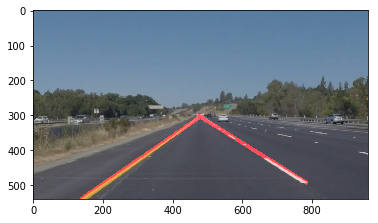

In [55]:

toprocess_img = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/solidWhiteCurve.jpg')
toprocess_img1 = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/solidYellowCurve2.jpg')
toprocess_img2 = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/solidWhiteRight.jpg')
toprocess_img3 = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/solidYellowCurve.jpg')
toprocess_img4 = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/whiteCarLaneSwitch.jpg')
toprocess_img5 = mpimg.imread('/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/test_images/solidYellowLeft.jpg')

#solidYellowLeft whiteCarLaneSwitch



#plt.imshow(process_image(toprocess_img))
#plt.imshow(process_image(toprocess_img1))
#plt.imshow(process_image(toprocess_img2))
#plt.imshow(process_image(toprocess_img3))
#plt.imshow(process_image(toprocess_img4))
plt.imshow(process_image(toprocess_img5))


## Test Moviepy

In [56]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Create a new video with `moviepy` by processing each frame to [YUV](https://en.wikipedia.org/wiki/YUV) color space.

[[[475 304 731 464]]

 [[481 305 870 538]]

 [[202 514 480 305]]

 [[727 463 847 538]]

 [[187 513 473 306]]

 [[495 312 719 447]]

 [[188 512 474 304]]

 [[479 305 688 436]]]
[MoviePy] >>>> Building video test_output.mp4
[MoviePy] Writing video test_output.mp4


  2%|▏         | 4/222 [00:00<00:06, 35.47it/s]

[[[475 304 731 464]]

 [[481 305 870 538]]

 [[202 514 480 305]]

 [[727 463 847 538]]

 [[187 513 473 306]]

 [[495 312 719 447]]

 [[188 512 474 304]]

 [[479 305 688 436]]]
[[[744 464 867 538]]

 [[471 303 796 506]]

 [[171 537 474 308]]

 [[484 309 717 455]]

 [[151 538 469 307]]

 [[498 310 756 471]]

 [[504 317 624 391]]

 [[501 306 846 538]]

 [[171 539 469 306]]

 [[248 469 474 305]]

 [[735 468 845 537]]

 [[357 397 471 308]]

 [[170 538 479 305]]

 [[481 305 774 481]]

 [[463 303 845 524]]]
[[[474 304 781 496]]

 [[481 305 819 508]]

 [[150 538 245 469]]

 [[170 538 479 305]]

 [[768 489 846 538]]

 [[469 309 867 538]]

 [[251 467 474 305]]

 [[178 518 459 321]]

 [[478 310 762 474]]

 [[480 314 868 538]]

 [[495 312 749 465]]

 [[171 538 471 304]]

 [[342 407 474 308]]

 [[466 304 817 507]]

 [[473 304 558 355]]]
[[[480 305 868 538]]

 [[477 305 709 450]]

 [[170 538 479 305]]

 [[482 305 815 505]]

 [[149 538 474 311]]

 [[472 303 847 538]]

 [[214 494 471 308]]

 [[224 494

  5%|▌         | 12/222 [00:00<00:05, 36.41it/s]

[[[472 302 849 538]]

 [[479 304 870 539]]

 [[481 304 871 538]]

 [[186 524 478 304]]

 [[162 525 473 307]]

 [[311 422 478 309]]

 [[486 309 627 400]]]
[[[478 306 865 539]]

 [[473 304 599 383]]

 [[482 306 578 364]]

 [[465 305 678 433]]

 [[666 427 748 477]]

 [[297 441 470 311]]

 [[310 423 482 307]]

 [[479 311 843 538]]

 [[451 304 790 492]]

 [[296 441 449 330]]

 [[471 305 844 538]]

 [[289 438 416 355]]

 [[464 305 855 531]]

 [[294 436 408 354]]

 [[479 306 865 538]]]
[[[475 307 860 538]]

 [[467 305 823 528]]

 [[263 458 473 311]]

 [[468 305 730 469]]

 [[488 317 580 373]]

 [[480 308 598 379]]

 [[284 454 473 307]]

 [[466 307 629 405]]

 [[470 305 596 378]]

 [[272 461 482 308]]

 [[467 304 557 358]]]
[[[468 305 857 538]]

 [[479 309 834 539]]

 [[230 482 478 309]]

 [[242 484 482 310]]

 [[509 324 618 394]]

 [[496 316 713 462]]

 [[454 307 855 538]]

 [[246 482 476 308]]

 [[470 305 716 464]]

 [[500 314 824 532]]]
[[[478 308 833 538]]

 [[495 315 820 518]]

 [[183 514

  9%|▉         | 20/222 [00:00<00:05, 36.82it/s]

[[[479 302 858 539]]

 [[482 302 717 460]]

 [[481 302 859 538]]

 [[473 300 751 481]]

 [[731 469 837 538]]

 [[137 539 476 301]]

 [[314 424 472 305]]

 [[136 538 487 301]]

 [[156 538 469 302]]

 [[482 303 588 374]]

 [[166 525 477 307]]]
[[[482 303 858 538]]

 [[473 300 720 461]]

 [[478 305 835 537]]

 [[373 382 472 305]]

 [[281 437 480 303]]

 [[495 310 715 448]]

 [[291 439 487 302]]

 [[293 439 475 307]]]
[[[481 304 856 538]]

 [[474 302 753 484]]

 [[475 302 696 446]]

 [[256 458 472 307]]

 [[265 459 487 304]]

 [[256 456 488 300]]

 [[495 311 833 538]]

 [[480 304 855 538]]

 [[269 456 474 307]]]
[[[480 305 854 539]]

 [[473 303 744 479]]

 [[695 448 833 538]]

 [[220 485 473 308]]

 [[235 485 489 301]]

 [[499 316 854 538]]

 [[495 312 579 365]]

 [[228 486 492 301]]]
[[[498 316 853 538]]

 [[473 304 831 537]]

 [[474 304 719 463]]

 [[310 422 488 302]]

 [[178 521 491 302]]

 [[321 424 474 309]]]
[[[497 315 854 538]]

 [[472 304 833 538]]

 [[301 439 490 302]]

 [[474 304

 13%|█▎        | 28/222 [00:00<00:05, 36.82it/s]

[[[482 305 855 538]]

 [[473 303 833 537]]

 [[205 508 472 307]]

 [[186 507 483 306]]

 [[709 457 833 538]]

 [[470 305 808 509]]

 [[203 509 476 303]]

 [[285 450 475 302]]

 [[476 302 854 538]]

 [[187 507 480 310]]]
[[[475 301 853 537]]

 [[473 301 681 437]]

 [[140 538 490 302]]

 [[182 525 477 303]]

 [[141 539 488 305]]

 [[488 314 833 538]]

 [[468 304 673 432]]

 [[163 539 490 301]]

 [[163 538 489 301]]

 [[658 423 830 523]]

 [[682 439 854 539]]

 [[501 316 747 470]]]
[[[476 302 854 538]]

 [[473 302 707 454]]

 [[143 539 483 309]]

 [[165 537 489 301]]

 [[476 301 855 538]]

 [[483 310 832 537]]

 [[165 539 472 307]]

 [[467 304 710 456]]

 [[155 530 477 305]]]
[[[473 303 834 538]]

 [[475 301 855 538]]

 [[142 539 491 304]]

 [[164 538 490 301]]

 [[498 314 856 538]]

 [[165 538 477 303]]

 [[474 301 586 376]]

 [[744 480 833 538]]]
[[[475 301 855 538]]

 [[473 302 781 503]]

 [[473 304 834 538]]

 [[175 529 489 301]]

 [[477 301 854 537]]

 [[307 425 491 301]]

 [[149 535

 16%|█▌        | 36/222 [00:00<00:05, 35.94it/s]

[[[475 300 857 539]]

 [[482 308 836 538]]

 [[474 301 675 432]]

 [[166 518 490 300]]

 [[191 516 489 300]]

 [[474 300 756 476]]

 [[166 520 488 303]]]
[[[474 302 835 537]]

 [[477 300 858 538]]

 [[475 300 840 528]]

 [[301 437 490 300]]

 [[292 436 475 307]]

 [[485 309 565 361]]

 [[335 404 489 304]]

 [[494 302 791 510]]]
[[[486 310 726 459]]

 [[483 310 834 538]]

 [[505 319 855 538]]

 [[267 452 491 301]]

 [[482 310 833 538]]

 [[282 453 475 308]]

 [[277 455 470 305]]

 [[468 304 617 390]]

 [[291 446 472 305]]

 [[487 305 683 432]]

 [[481 310 593 375]]]
[[[534 338 854 538]]

 [[482 310 833 538]]

 [[485 310 731 463]]

 [[246 478 489 302]]

 [[235 475 471 310]]

 [[240 473 475 309]]

 [[489 314 820 529]]

 [[275 459 474 309]]

 [[496 313 632 401]]]
[[[475 307 832 538]]

 [[480 306 854 539]]

 [[203 509 488 302]]

 [[192 508 475 310]]

 [[191 506 493 302]]

 [[479 306 779 493]]

 [[209 508 477 306]]

 [[485 305 592 382]]

 [[478 306 588 378]]

 [[467 305 664 428]]

 [[308 430

 18%|█▊        | 40/222 [00:01<00:05, 34.67it/s]

[[[479 304 854 538]]

 [[475 305 832 537]]

 [[144 538 493 303]]

 [[164 538 486 304]]

 [[481 304 855 538]]

 [[482 304 575 369]]

 [[486 303 598 384]]

 [[225 488 477 305]]

 [[487 301 632 406]]

 [[158 528 441 330]]

 [[696 449 833 538]]]
[[[486 308 855 538]]

 [[480 303 763 493]]

 [[489 310 675 435]]

 [[486 303 601 380]]

 [[488 300 763 492]]

 [[142 538 487 305]]

 [[180 524 489 300]]

 [[165 524 479 304]]

 [[496 303 833 539]]

 [[163 538 439 330]]]
[[[482 305 854 538]]

 [[480 303 719 464]]

 [[482 303 576 362]]

 [[475 305 833 538]]

 [[289 440 420 342]]

 [[360 393 441 330]]

 [[476 304 579 364]]]
[[[483 307 853 538]]

 [[479 303 753 487]]

 [[549 344 767 496]]

 [[493 302 831 539]]

 [[273 458 474 307]]

 [[258 460 437 330]]

 [[498 311 580 366]]

 [[257 459 450 324]]]
[[[487 304 728 460]]

 [[480 303 752 486]]

 [[486 302 798 504]]

 [[221 483 479 303]]

 [[242 481 474 307]]

 [[727 469 832 538]]

 [[477 303 854 538]]

 [[487 300 741 478]]]


 20%|█▉        | 44/222 [00:01<00:05, 35.59it/s]

[[[477 304 853 539]]

 [[480 303 783 507]]

 [[497 311 715 452]]

 [[173 516 476 304]]

 [[324 420 479 303]]

 [[475 305 773 499]]

 [[315 417 481 305]]

 [[679 428 779 492]]

 [[330 415 437 332]]

 [[501 309 790 511]]

 [[494 302 829 536]]]
[[[712 458 832 538]]

 [[478 304 854 538]]

 [[524 328 725 468]]

 [[295 431 478 308]]

 [[496 311 641 412]]

 [[475 304 651 410]]

 [[305 434 479 303]]

 [[508 309 677 436]]

 [[501 309 805 521]]

 [[474 306 727 458]]

 [[296 430 474 305]]

 [[502 310 665 428]]

 [[507 309 746 482]]]


 22%|██▏       | 48/222 [00:01<00:05, 30.91it/s]

[[[544 345 832 539]]

 [[479 303 855 538]]

 [[273 447 478 304]]

 [[476 304 585 367]]

 [[282 450 404 352]]

 [[720 463 832 538]]

 [[501 313 727 459]]

 [[270 448 478 308]]

 [[495 310 637 409]]

 [[336 410 445 325]]

 [[277 451 475 307]]

 [[286 437 475 305]]

 [[309 430 456 303]]]
[[[481 304 753 487]]

 [[496 311 691 437]]

 [[241 468 475 304]]

 [[597 375 780 493]]

 [[251 472 445 326]]

 [[728 470 832 538]]

 [[722 455 828 523]]

 [[262 465 476 304]]

 [[545 346 831 538]]

 [[240 470 366 379]]]
[[[478 304 853 538]]

 [[509 321 830 538]]

 [[213 501 444 327]]

 [[198 498 474 305]]

 [[498 312 676 436]]

 [[534 335 748 484]]

 [[482 308 638 402]]

 [[478 308 699 441]]

 [[198 499 481 308]]

 [[505 318 623 392]]

 [[474 308 657 414]]

 [[234 486 445 327]]

 [[476 305 678 436]]]
[[[544 346 830 539]]

 [[478 304 853 538]]

 [[141 538 474 305]]

 [[496 312 623 392]]

 [[162 539 443 327]]

 [[480 304 764 495]]

 [[482 308 638 402]]

 [[162 538 289 439]]

 [[140 538 427 337]]]
[[[565 360

 23%|██▎       | 52/222 [00:01<00:05, 29.87it/s]

[[[478 304 853 538]]

 [[481 304 830 539]]

 [[497 313 672 423]]

 [[136 539 481 306]]

 [[484 309 627 395]]

 [[302 422 476 305]]

 [[136 538 476 309]]

 [[475 305 683 430]]

 [[156 538 383 367]]

 [[478 309 752 474]]

 [[503 310 825 535]]]
[[[482 304 830 539]]

 [[480 304 736 464]]

 [[659 415 811 513]]

 [[294 437 478 304]]

 [[481 308 571 364]]

 [[282 435 474 305]]

 [[496 312 571 359]]

 [[474 309 844 532]]

 [[501 308 828 537]]

 [[349 390 480 309]]

 [[477 305 580 365]]]
[[[480 304 760 479]]

 [[566 361 830 539]]

 [[479 304 562 360]]

 [[268 455 475 305]]

 [[473 307 788 497]]

 [[254 455 476 305]]

 [[481 314 850 536]]

 [[495 312 605 381]]

 [[541 345 665 428]]]


 25%|██▌       | 56/222 [00:01<00:05, 30.06it/s]

[[[511 324 851 537]]

 [[482 308 599 384]]

 [[495 313 829 538]]

 [[218 479 472 308]]

 [[230 480 473 310]]

 [[481 310 585 375]]

 [[537 339 630 406]]

 [[231 480 474 310]]

 [[481 315 852 538]]

 [[481 309 594 375]]

 [[487 314 793 513]]]
[[[481 311 830 538]]

 [[510 324 850 537]]

 [[480 311 613 394]]

 [[169 513 472 309]]

 [[187 512 475 311]]

 [[611 388 851 538]]

 [[481 310 589 378]]

 [[481 316 850 538]]

 [[465 304 679 438]]]
[[[503 320 851 538]]

 [[480 311 829 538]]

 [[481 311 732 474]]

 [[482 312 676 429]]

 [[464 305 841 532]]

 [[286 435 488 304]]

 [[298 436 470 307]]

 [[474 312 684 434]]

 [[453 304 761 482]]

 [[302 424 485 301]]

 [[286 436 488 305]]

 [[470 306 719 456]]]
[[[474 304 848 538]]

 [[471 306 828 538]]

 [[475 306 665 430]]

 [[485 308 594 378]]

 [[260 453 487 300]]

 [[272 454 489 302]]

 [[485 304 619 394]]

 [[267 455 488 301]]

 [[481 316 668 424]]

 [[271 454 489 301]]

 [[509 324 679 431]]]

 27%|██▋       | 60/222 [00:01<00:05, 29.42it/s]


[[[485 305 798 508]]

 [[478 306 573 370]]

 [[506 320 707 460]]

 [[226 474 474 307]]

 [[238 476 489 301]]

 [[485 302 781 509]]

 [[489 304 825 539]]

 [[743 472 847 539]]

 [[485 306 579 374]]

 [[489 300 744 485]]

 [[486 301 620 401]]

 [[227 474 486 300]]

 [[586 377 825 538]]]
[[[480 307 823 538]]

 [[485 306 844 539]]

 [[221 490 442 330]]

 [[181 505 475 307]]

 [[485 307 730 466]]

 [[200 505 353 390]]

 [[477 307 623 402]]

 [[194 507 489 301]]]


 28%|██▊       | 63/222 [00:01<00:05, 29.33it/s]

[[[556 358 824 538]]

 [[133 537 425 340]]

 [[480 307 678 431]]

 [[476 307 837 533]]

 [[151 538 489 301]]

 [[473 309 712 453]]

 [[147 528 489 305]]

 [[487 315 636 405]]

 [[473 308 632 408]]

 [[478 307 573 364]]]
[[[480 307 823 538]]

 [[476 307 810 516]]

 [[132 538 475 307]]

 [[479 307 690 439]]

 [[152 538 247 471]]

 [[252 465 487 300]]

 [[152 537 489 301]]

 [[474 308 565 365]]

 [[629 408 844 538]]

 [[494 314 630 402]]]
[[[479 307 821 538]]

 [[497 316 645 412]]

 [[484 306 842 538]]

 [[132 539 487 300]]

 [[137 533 491 303]]

 [[151 538 388 366]]

 [[131 538 473 308]]

 [[325 414 488 300]]

 [[164 529 490 300]]

 [[486 308 842 539]]

 [[480 311 687 446]]]
[[[484 307 842 539]]

 [[479 307 821 538]]

 [[484 306 842 538]]

 [[477 307 820 538]]

 [[514 327 594 380]]

 [[130 539 434 334]]

 [[148 538 488 300]]

 [[484 305 636 407]]]


 30%|██▉       | 66/222 [00:02<00:05, 28.82it/s]

[[[475 307 820 523]]

 [[479 307 821 538]]

 [[493 313 687 439]]

 [[278 439 472 308]]

 [[286 439 484 305]]

 [[474 308 573 370]]

 [[485 306 842 538]]

 [[477 307 820 538]]]
[[[478 305 824 538]]

 [[724 460 845 538]]

 [[496 314 712 454]]

 [[248 458 476 305]]

 [[484 305 844 539]]

 [[262 455 477 305]]

 [[480 307 823 539]]

 [[256 455 492 302]]

 [[247 455 486 300]]]


 31%|███       | 69/222 [00:02<00:05, 28.71it/s]

[[[479 305 825 538]]

 [[496 313 766 488]]

 [[496 314 726 463]]

 [[230 478 485 300]]

 [[480 307 824 539]]

 [[213 482 476 305]]

 [[211 479 487 300]]]
[[[478 305 824 538]]

 [[513 326 661 422]]

 [[475 306 845 537]]

 [[473 307 651 414]]

 [[163 514 464 311]]

 [[185 509 477 305]]

 [[166 514 493 302]]

 [[163 511 489 300]]

 [[480 307 824 539]]

 [[181 510 491 301]]

 [[774 493 845 539]]

 [[496 313 586 373]]]
[[[481 305 768 491]]

 [[476 305 822 538]]

 [[747 476 844 539]]

 [[296 433 485 301]]

 [[287 432 468 310]]

 [[481 309 822 539]]

 [[485 306 833 532]]

 [[287 430 489 304]]]
[[[477 305 822 538]]

 [[496 314 795 508]]

 [[496 313 843 538]]

 [[261 449 473 306]]

 [[271 449 476 306]]

 [[279 444 491 301]]

 [[480 309 821 539]]]


 32%|███▏      | 72/222 [00:02<00:05, 28.32it/s]

[[[484 310 822 538]]

 [[480 305 630 402]]

 [[496 313 843 538]]

 [[240 470 475 306]]

 [[230 469 464 311]]

 [[499 316 776 496]]

 [[243 469 477 305]]

 [[230 468 309 415]]

 [[481 309 819 537]]]
[[[477 305 745 486]]

 [[481 305 788 504]]

 [[187 497 489 301]]

 [[476 306 820 538]]

 [[495 313 842 538]]

 [[202 498 472 309]]

 [[186 496 486 301]]

 [[479 307 820 537]]

 [[187 498 423 339]]

 [[201 498 385 365]]]


 34%|███▍      | 75/222 [00:02<00:05, 27.82it/s]

[[[475 306 820 538]]

 [[495 314 841 539]]

 [[144 539 477 306]]

 [[127 536 489 301]]

 [[478 306 793 519]]

 [[485 306 842 538]]

 [[159 528 379 369]]

 [[577 368 648 415]]

 [[232 466 492 303]]

 [[142 537 479 310]]]
[[[480 305 841 539]]

 [[476 306 820 538]]

 [[131 532 486 301]]

 [[143 539 475 306]]

 [[477 306 741 484]]

 [[124 538 489 301]]

 [[528 337 676 433]]

 [[143 538 474 306]]

 [[124 537 479 315]]

 [[124 539 476 310]]

 [[249 458 472 307]]]
[[[494 312 841 538]]

 [[478 309 818 538]]

 [[473 306 748 478]]

 [[476 305 593 378]]

 [[140 539 475 305]]

 [[120 538 486 300]]

 [[472 308 669 436]]

 [[121 539 490 300]]

 [[472 306 788 504]]

 [[452 302 622 397]]

 [[469 307 605 392]]

 [[121 538 488 300]]

 [[480 309 819 538]]

 [[140 538 319 408]]

 [[214 481 491 301]]

 [[496 313 663 425]]]
[[[474 305 819 538]]

 [[478 304 839 538]]

 [[477 304 839 539]]

 [[119 538 486 300]]

 [[138 538 445 323]]

 [[476 304 592 383]]

 [[162 513 490 300]]

 [[472 306 612 397]]

 [[362 378

 35%|███▌      | 78/222 [00:02<00:05, 27.00it/s]

[[[476 304 838 539]]

 [[473 305 818 538]]

 [[478 304 839 538]]

 [[679 445 817 538]]

 [[472 306 603 391]]

 [[477 304 825 530]]

 [[290 436 446 323]]

 [[345 390 492 302]]

 [[284 437 488 300]]]
[[[477 305 836 538]]

 [[478 305 753 497]]

 [[674 441 814 539]]

 [[354 391 472 306]]

 [[484 305 578 370]]

 [[333 398 490 300]]

 [[259 454 488 300]]]


 36%|███▋      | 81/222 [00:02<00:05, 27.40it/s]

[[[476 305 835 538]]

 [[478 305 813 539]]

 [[483 304 585 375]]

 [[319 406 489 300]]

 [[474 305 832 537]]

 [[485 301 808 535]]

 [[219 477 479 309]]

 [[471 308 640 410]]

 [[225 477 487 300]]

 [[480 304 604 394]]

 [[471 307 620 397]]]
[[[476 304 834 537]]

 [[478 305 812 539]]

 [[303 417 489 300]]

 [[183 508 473 305]]

 [[734 483 813 538]]

 [[479 305 631 404]]

 [[474 305 834 539]]

 [[179 508 488 300]]

 [[484 302 559 363]]

 [[471 309 795 512]]]
[[[478 305 811 538]]

 [[484 304 792 512]]

 [[493 312 716 462]]

 [[283 430 484 305]]

 [[744 479 833 539]]

 [[292 432 474 305]]

 [[292 424 476 305]]]
[[[483 309 811 539]]

 [[494 312 790 511]]

 [[522 332 675 435]]

 [[257 446 485 304]]

 [[277 443 473 306]]

 [[268 448 395 356]]

 [[492 304 756 488]]

 [[258 448 481 309]]]


 38%|███▊      | 84/222 [00:02<00:05, 26.73it/s]

[[[479 306 810 538]]

 [[485 305 831 538]]

 [[226 467 477 304]]

 [[238 468 488 300]]

 [[479 307 812 524]]

 [[494 312 586 376]]

 [[236 469 485 301]]

 [[479 309 623 399]]]
[[[476 305 810 539]]

 [[485 305 831 538]]

 [[196 497 487 301]]

 [[536 342 631 406]]

 [[214 474 485 304]]

 [[182 495 487 305]]

 [[488 306 652 420]]

 [[485 301 717 463]]

 [[509 311 811 538]]

 [[478 305 803 533]]

 [[479 305 583 373]]]


 39%|███▉      | 87/222 [00:02<00:05, 26.95it/s]

[[[478 305 811 538]]

 [[495 313 794 514]]

 [[137 537 488 301]]

 [[532 339 682 440]]

 [[188 491 486 304]]

 [[122 536 477 305]]

 [[122 534 475 305]]

 [[656 431 822 531]]

 [[481 304 653 429]]]
[[[477 305 810 538]]

 [[535 341 670 432]]

 [[495 313 782 506]]

 [[137 538 489 301]]

 [[201 485 485 301]]

 [[116 538 488 305]]

 [[186 493 487 305]]

 [[482 310 831 537]]

 [[117 538 476 305]]]
[[[478 305 809 537]]

 [[118 538 477 305]]

 [[496 314 754 488]]

 [[495 313 830 539]]

 [[480 307 810 538]]

 [[138 537 220 483]]

 [[481 309 809 539]]

 [[137 538 489 301]]

 [[496 313 637 411]]]
[[[476 306 731 472]]

 [[486 305 808 539]]

 [[519 332 702 464]]

 [[485 304 806 537]]

 [[118 538 478 305]]

 [[600 392 802 519]]

 [[476 310 593 386]]

 [[163 520 486 302]]

 [[488 302 730 484]]

 [[475 304 654 421]]

 [[139 538 475 303]]

 [[478 310 830 538]]

 [[571 372 743 480]]]


 41%|████      | 90/222 [00:02<00:04, 26.56it/s]

[[[477 305 808 537]]

 [[482 305 788 511]]

 [[495 313 830 539]]

 [[481 309 809 538]]

 [[276 436 476 306]]

 [[279 438 491 301]]

 [[479 305 602 388]]

 [[284 438 486 302]]]
[[[538 343 828 539]]

 [[513 328 722 479]]

 [[495 313 829 538]]

 [[630 412 738 490]]

 [[490 302 768 511]]

 [[475 304 808 538]]

 [[256 456 493 302]]

 [[334 399 492 301]]

 [[254 456 476 307]]

 [[480 306 699 453]]

 [[419 318 515 313]]]


 42%|████▏     | 93/222 [00:03<00:04, 27.43it/s]

[[[481 306 622 408]]

 [[480 306 723 469]]

 [[476 307 808 539]]

 [[491 312 761 494]]

 [[488 308 829 538]]

 [[211 481 486 302]]

 [[479 306 667 438]]

 [[226 479 488 302]]

 [[486 304 662 436]]

 [[473 309 730 483]]

 [[485 305 787 524]]

 [[491 306 742 481]]

 [[489 307 808 538]]

 [[474 308 664 436]]]
[[[491 312 828 539]]

 [[478 306 743 492]]

 [[482 310 808 538]]

 [[183 509 492 301]]

 [[486 307 829 538]]

 [[165 510 480 306]]

 [[187 508 474 307]]

 [[479 306 558 360]]

 [[176 509 492 304]]

 [[305 419 492 302]]

 [[491 306 566 367]]]
[[[503 320 828 539]]

 [[479 306 772 512]]

 [[485 305 563 358]]

 [[489 309 827 537]]

 [[295 433 490 302]]

 [[477 307 808 538]]

 [[286 432 480 306]]

 [[481 306 592 384]]]
[[[550 349 830 538]]

 [[478 305 810 538]]

 [[480 305 681 440]]

 [[271 448 476 310]]

 [[479 310 648 416]]

 [[262 445 478 310]]

 [[463 305 654 420]]

 [[497 312 569 361]]

 [[466 305 695 448]]

 [[520 326 721 466]]

 [[262 447 474 309]]

 [[510 324 704 464]]]
[[[481 304

 43%|████▎     | 96/222 [00:03<00:04, 27.99it/s]

[[[531 332 765 495]]

 [[498 312 782 518]]

 [[499 312 824 532]]

 [[190 492 481 303]]

 [[202 495 478 309]]

 [[500 316 713 470]]

 [[508 311 801 531]]

 [[569 361 831 538]]

 [[515 326 746 493]]

 [[190 493 476 308]]

 [[201 495 477 309]]]
[[[522 330 811 539]]

 [[482 304 830 539]]

 [[133 530 481 304]]

 [[518 323 722 465]]

 [[147 532 483 306]]

 [[145 532 483 304]]

 [[132 531 236 461]]

 [[508 310 811 538]]

 [[498 311 595 384]]

 [[675 432 830 537]]

 [[484 308 786 520]]]


 45%|████▍     | 99/222 [00:03<00:04, 28.21it/s]

[[[493 308 811 539]]

 [[493 309 809 522]]

 [[117 539 480 303]]

 [[137 538 483 305]]

 [[495 308 812 538]]

 [[483 303 831 538]]

 [[500 311 589 372]]

 [[481 303 677 441]]

 [[375 372 484 307]]]
[[[485 302 708 453]]

 [[484 305 689 449]]

 [[479 303 756 497]]

 [[136 538 484 303]]

 [[743 477 832 539]]

 [[482 303 561 357]]

 [[117 539 197 485]]

 [[498 310 647 411]]

 [[476 304 751 483]]

 [[215 476 483 302]]

 [[484 307 733 481]]

 [[483 307 706 452]]

 [[175 500 493 309]]]


 46%|████▌     | 102/222 [00:03<00:04, 28.69it/s]

[[[493 309 660 430]]

 [[584 370 832 538]]

 [[494 308 812 539]]

 [[137 538 484 304]]

 [[495 308 572 360]]

 [[117 539 479 304]]

 [[482 303 831 538]]

 [[117 537 491 312]]

 [[138 537 363 380]]

 [[139 522 484 306]]]
[[[499 313 768 508]]

 [[500 313 809 522]]

 [[493 310 831 538]]

 [[495 309 811 538]]

 [[284 436 480 304]]

 [[358 392 483 304]]

 [[484 307 574 368]]

 [[511 319 600 388]]]
[[[480 305 811 537]]

 [[496 310 808 521]]

 [[479 306 745 479]]

 [[485 309 702 450]]

 [[477 307 832 538]]

 [[482 316 787 507]]

 [[339 398 484 307]]

 [[348 400 478 306]]

 [[454 303 620 395]]]
[[[482 306 813 538]]

 [[495 311 832 538]]

 [[335 410 484 306]]

 [[228 477 481 306]]

 [[224 477 476 308]]

 [[480 306 756 486]]

 [[476 310 638 408]]]


 47%|████▋     | 105/222 [00:03<00:04, 28.06it/s]

[[[498 313 834 539]]

 [[481 305 814 538]]

 [[483 305 748 491]]

 [[319 420 484 305]]

 [[188 506 414 348]]

 [[506 317 834 538]]

 [[194 505 477 307]]

 [[179 504 477 311]]]
[[[498 312 835 539]]

 [[484 305 748 490]]

 [[482 305 815 538]]

 [[511 319 836 538]]

 [[293 430 484 306]]

 [[300 432 481 310]]

 [[292 429 484 309]]

 [[483 305 816 538]]

 [[310 427 477 306]]]


 49%|████▊     | 108/222 [00:03<00:03, 28.54it/s]

[[[482 304 816 538]]

 [[510 318 837 539]]

 [[496 310 795 511]]

 [[279 447 483 304]]

 [[269 446 478 305]]

 [[481 304 599 384]]

 [[484 305 817 538]]

 [[295 437 448 326]]]
[[[482 304 817 538]]

 [[512 319 838 539]]

 [[239 467 479 305]]

 [[496 310 734 470]]

 [[249 468 481 305]]

 [[252 467 483 305]]

 [[480 305 667 432]]

 [[494 310 612 393]]

 [[516 322 820 527]]

 [[238 465 431 340]]

 [[504 316 680 443]]]
[[[483 305 817 538]]

 [[510 318 838 539]]

 [[205 489 477 306]]

 [[207 496 485 309]]

 [[497 310 767 492]]

 [[242 475 480 309]]

 [[480 305 656 424]]

 [[506 320 600 384]]

 [[247 470 482 305]]

 [[252 467 433 336]]]
[[[494 311 818 538]]

 [[510 319 837 539]]

 [[142 531 484 309]]

 [[157 534 483 306]]

 [[242 464 488 310]]

 [[497 312 622 400]]

 [[481 305 810 519]]

 [[477 306 740 484]]

 [[142 530 398 358]]

 [[384 368 479 306]]]


 50%|█████     | 111/222 [00:03<00:03, 27.90it/s]

[[[484 306 816 538]]

 [[132 539 477 307]]

 [[513 321 837 539]]

 [[152 538 485 305]]

 [[496 311 576 369]]

 [[539 339 741 485]]

 [[481 306 644 416]]

 [[550 345 836 538]]

 [[267 459 445 330]]

 [[131 538 481 311]]]
[[[493 311 817 538]]

 [[537 337 808 519]]

 [[154 539 442 330]]

 [[133 538 485 309]]

 [[482 306 656 424]]

 [[147 528 481 311]]

 [[504 316 689 440]]

 [[483 306 815 522]]

 [[370 378 481 306]]

 [[482 316 838 538]]

 [[332 412 477 307]]]


 51%|█████▏    | 114/222 [00:03<00:03, 28.23it/s]

[[[493 311 819 539]]

 [[553 347 790 506]]

 [[497 312 819 538]]

 [[133 538 485 310]]

 [[154 538 424 342]]

 [[534 335 741 474]]

 [[362 383 476 309]]

 [[308 421 484 307]]

 [[484 308 599 383]]

 [[309 422 480 311]]]
[[[591 372 800 512]]

 [[496 311 821 538]]

 [[485 305 744 486]]

 [[698 443 841 539]]

 [[477 306 595 375]]

 [[297 436 466 314]]

 [[486 311 573 360]]

 [[509 319 620 399]]

 [[353 389 475 310]]

 [[495 311 820 539]]]
[[[495 310 822 539]]

 [[614 386 811 518]]

 [[537 336 620 391]]

 [[497 310 823 538]]

 [[259 453 477 306]]

 [[271 452 475 309]]

 [[478 306 602 378]]

 [[343 395 482 305]]

 [[680 431 844 538]]

 [[479 305 712 451]]]
[[[499 313 831 529]]

 [[550 349 642 411]]

 [[481 305 767 498]]

 [[483 305 676 426]]

 [[227 473 477 305]]

 [[479 305 652 418]]

 [[511 311 823 538]]

 [[230 476 484 305]]

 [[738 469 844 538]]

 [[662 425 743 483]]

 [[240 474 482 305]]

 [[649 408 823 539]]

 [[500 313 595 373]]

 [[480 305 722 457]]

 [[226 475 480 310]]

 [[669 422

 53%|█████▎    | 117/222 [00:03<00:03, 28.13it/s]

[[[500 313 845 537]]

 [[556 353 661 424]]

 [[724 469 825 538]]

 [[181 506 478 306]]

 [[200 503 483 305]]

 [[477 307 720 465]]

 [[456 303 843 536]]

 [[184 506 356 386]]

 [[598 375 722 458]]

 [[192 503 484 306]]

 [[480 308 700 451]]

 [[500 317 778 505]]

 [[476 308 845 538]]]
[[[495 310 846 538]]

 [[493 311 680 437]]

 [[715 463 826 538]]

 [[296 426 482 305]]

 [[306 428 451 327]]

 [[477 307 732 473]]

 [[484 308 749 474]]

 [[655 412 788 501]]

 [[140 537 484 305]]

 [[478 306 690 444]]

 [[142 537 451 328]]

 [[512 313 757 491]]]


 54%|█████▍    | 120/222 [00:03<00:03, 28.15it/s]

[[[496 310 848 538]]

 [[483 305 810 526]]

 [[282 444 481 305]]

 [[482 305 827 538]]

 [[273 441 448 327]]

 [[498 310 784 496]]

 [[477 307 845 537]]

 [[274 442 486 310]]

 [[497 311 635 407]]]
[[[482 306 826 538]]

 [[671 423 847 537]]

 [[497 311 701 453]]

 [[256 464 481 306]]

 [[270 444 463 318]]

 [[484 306 649 409]]

 [[245 461 486 310]]

 [[493 312 786 510]]

 [[517 324 847 538]]

 [[251 465 484 308]]

 [[419 317 513 314]]]
[[[550 351 827 538]]

 [[597 376 849 539]]

 [[206 489 307 421]]

 [[220 491 405 357]]

 [[499 315 577 365]]

 [[480 307 850 538]]

 [[482 306 719 454]]

 [[218 491 476 310]]

 [[207 491 485 311]]

 [[500 316 612 386]]

 [[479 307 701 452]]

 [[476 309 765 483]]]
[[[483 307 572 367]]

 [[484 307 684 432]]

 [[165 528 482 306]]

 [[513 327 827 539]]

 [[152 526 351 392]]

 [[476 311 819 517]]

 [[485 312 734 474]]

 [[453 307 720 455]]

 [[166 528 447 331]]

 [[501 316 611 385]]

 [[745 483 823 534]]

 [[453 308 742 469]]

 [[243 463 472 314]]

 [[476 312

 55%|█████▌    | 123/222 [00:04<00:03, 27.29it/s]

[[[484 309 662 425]]

 [[481 306 852 538]]

 [[132 539 261 452]]

 [[151 538 476 311]]

 [[522 328 716 463]]

 [[573 361 828 539]]

 [[258 462 476 309]]

 [[633 399 740 479]]

 [[502 320 851 538]]

 [[196 494 484 307]]

 [[499 315 627 395]]

 [[251 467 481 312]]

 [[512 312 767 497]]

 [[558 352 759 492]]

 [[149 526 478 312]]]
[[[500 316 736 464]]

 [[500 315 830 538]]

 [[479 307 590 377]]

 [[133 536 484 308]]

 [[477 309 756 477]]

 [[151 538 480 307]]

 [[473 310 852 538]]

 [[477 311 810 511]]

 [[159 518 484 307]]

 [[380 380 466 315]]

 [[504 317 634 399]]]
[[[544 346 831 539]]

 [[500 315 711 447]]

 [[482 305 854 538]]

 [[707 455 798 515]]

 [[143 529 490 303]]

 [[491 312 563 360]]

 [[150 539 480 308]]

 [[493 307 655 420]]

 [[753 486 831 537]]

 [[151 537 480 306]]

 [[480 311 703 451]]

 [[485 309 650 409]]

 [[469 308 853 539]]

 [[313 421 394 371]]

 [[184 504 473 309]]]
[[[484 306 854 537]]

 [[480 306 752 483]]

 [[481 306 704 451]]

 [[489 305 567 357]]

 [[513 314

 57%|█████▋    | 127/222 [00:04<00:03, 27.86it/s]

[[[485 306 857 538]]

 [[485 308 726 465]]

 [[480 307 836 538]]

 [[280 451 492 303]]

 [[347 397 493 306]]

 [[269 451 490 302]]

 [[481 311 698 447]]

 [[483 305 559 351]]]
[[[490 308 858 538]]

 [[481 306 789 506]]

 [[735 472 836 538]]

 [[248 473 489 304]]

 [[234 474 483 306]]

 [[485 309 837 538]]

 [[490 306 636 401]]]


 59%|█████▊    | 130/222 [00:04<00:03, 28.31it/s]

[[[495 312 858 539]]

 [[489 311 833 535]]

 [[755 485 836 538]]

 [[191 503 480 308]]

 [[321 416 480 312]]

 [[202 502 486 311]]

 [[488 311 837 538]]]
[[[490 307 859 538]]

 [[486 310 837 538]]

 [[481 306 830 533]]

 [[484 306 858 539]]

 [[302 429 493 305]]

 [[313 430 480 309]]

 [[495 312 856 537]]

 [[151 537 478 308]]]
[[[488 307 859 539]]

 [[486 311 837 539]]

 [[485 308 838 538]]

 [[282 444 491 303]]

 [[481 307 837 538]]

 [[291 447 490 303]]

 [[488 306 621 392]]

 [[492 304 653 412]]

 [[293 445 473 310]]]
[[[481 308 836 538]]

 [[485 307 857 539]]

 [[266 466 474 310]]

 [[253 464 491 304]]

 [[478 309 859 538]]

 [[482 307 837 538]]

 [[326 423 479 308]]

 [[253 465 492 304]]

 [[264 467 484 307]]]


 60%|█████▉    | 133/222 [00:04<00:03, 27.89it/s]

[[[488 307 858 538]]

 [[489 312 838 538]]

 [[216 492 477 309]]

 [[272 462 474 310]]

 [[491 311 772 486]]

 [[225 493 486 311]]

 [[230 492 491 302]]

 [[266 457 479 308]]

 [[504 321 837 537]]]
[[[491 309 839 526]]

 [[490 311 839 538]]

 [[178 528 491 301]]

 [[164 527 478 307]]

 [[481 307 838 538]]

 [[488 306 860 538]]

 [[171 521 290 438]]]


 61%|██████▏   | 136/222 [00:04<00:03, 28.25it/s]

[[[490 306 861 538]]

 [[481 305 839 538]]

 [[143 539 475 307]]

 [[482 304 714 455]]

 [[163 539 490 301]]

 [[483 304 860 539]]

 [[162 538 485 304]]

 [[492 308 860 538]]

 [[478 306 663 422]]

 [[143 538 493 302]]]
[[[492 307 862 538]]

 [[485 306 842 538]]

 [[161 538 485 303]]

 [[142 538 235 473]]

 [[481 304 841 538]]

 [[492 306 863 538]]

 [[142 539 477 305]]

 [[478 305 616 385]]]
[[[482 303 834 532]]

 [[485 303 863 539]]

 [[492 306 864 538]]

 [[161 538 477 309]]

 [[142 538 317 416]]

 [[763 487 837 534]]

 [[477 305 669 425]]

 [[142 539 427 340]]

 [[477 306 743 473]]

 [[141 538 485 306]]]
[[[490 309 843 538]]

 [[492 307 844 526]]

 [[488 303 865 539]]

 [[298 430 477 305]]

 [[303 433 489 303]]

 [[477 306 658 411]]

 [[302 429 482 303]]

 [[306 432 484 303]]]


 63%|██████▎   | 139/222 [00:04<00:03, 27.18it/s]

[[[488 305 863 539]]

 [[485 307 842 539]]

 [[491 308 759 475]]

 [[350 395 490 301]]

 [[283 449 493 302]]

 [[488 304 738 472]]

 [[768 479 863 538]]]
[[[482 305 841 538]]

 [[492 309 806 505]]

 [[488 306 861 539]]

 [[240 474 478 307]]

 [[257 471 490 302]]

 [[477 307 681 435]]

 [[705 452 803 514]]

 [[485 308 840 539]]]


 66%|██████▌   | 146/222 [00:05<00:03, 22.18it/s]

[[[485 306 821 515]]

 [[485 309 839 539]]

 [[205 500 482 306]]

 [[211 501 494 303]]

 [[490 307 858 537]]

 [[486 310 817 525]]

 [[210 501 493 303]]]
[[[490 308 858 538]]

 [[485 310 837 538]]

 [[483 307 674 431]]

 [[316 430 468 315]]

 [[307 429 496 306]]

 [[490 304 751 473]]

 [[308 427 492 303]]

 [[169 537 478 313]]

 [[480 309 660 422]]

 [[492 310 858 539]]

 [[149 539 479 308]]]
[[[492 310 858 539]]

 [[485 310 837 538]]

 [[482 307 838 538]]

 [[287 443 483 306]]

 [[294 446 485 307]]

 [[295 446 492 303]]]
[[[485 306 858 539]]

 [[482 307 838 538]]

 [[260 462 483 306]]

 [[271 464 493 303]]

 [[268 465 491 303]]

 [[481 308 631 402]]

 [[490 307 671 429]]

 [[490 308 858 538]]]
[[[490 308 859 538]]

 [[482 307 838 538]]

 [[223 488 480 308]]

 [[234 490 492 303]]

 [[224 488 496 305]]

 [[236 490 437 339]]

 [[756 485 837 538]]

 [[239 489 450 330]]]
[[[490 306 862 538]]

 [[483 305 841 538]]

 [[193 523 482 306]]

 [[175 523 490 303]]

 [[233 481 495 304]]

 [[486 309

 69%|██████▉   | 153/222 [00:05<00:02, 25.31it/s]

[[[482 305 867 537]]

 [[484 303 846 538]]

 [[157 534 481 307]]

 [[483 304 733 455]]

 [[484 304 846 539]]

 [[171 539 340 407]]

 [[497 311 604 376]]

 [[173 523 494 306]]

 [[638 405 868 538]]

 [[170 538 477 307]]

 [[174 536 478 307]]

 [[491 305 799 497]]]
[[[486 307 870 538]]

 [[492 307 848 538]]

 [[480 306 747 473]]

 [[491 302 627 397]]

 [[152 538 491 301]]

 [[553 343 645 402]]

 [[170 538 477 307]]

 [[482 306 580 365]]

 [[491 304 595 371]]

 [[152 537 497 304]]

 [[479 306 686 426]]

 [[209 501 445 330]]]
[[[483 305 871 538]]

 [[485 304 745 472]]

 [[495 308 850 538]]

 [[588 365 789 500]]

 [[484 304 683 433]]

 [[535 333 677 421]]

 [[363 390 486 310]]

 [[370 391 479 306]]

 [[364 389 481 310]]]
[[[483 305 872 538]]

 [[480 307 850 538]]

 [[482 306 661 418]]

 [[492 308 618 384]]

 [[491 312 581 366]]

 [[353 397 494 302]]

 [[477 309 719 455]]

 [[289 451 491 305]]

 [[294 450 478 307]]

 [[492 311 870 538]]]
[[[482 307 869 539]]

 [[480 308 848 538]]

 [[492 307

 72%|███████▏  | 159/222 [00:05<00:02, 26.89it/s]

[[[485 304 847 539]]

 [[492 305 793 493]]

 [[310 427 484 305]]

 [[173 534 493 302]]

 [[481 306 613 386]]

 [[782 485 868 538]]

 [[492 306 713 444]]

 [[334 419 478 307]]]
[[[498 311 848 539]]

 [[492 305 779 484]]

 [[491 303 869 539]]

 [[289 442 482 307]]

 [[296 445 481 310]]

 [[477 307 553 344]]

 [[481 306 606 381]]

 [[297 445 437 336]]

 [[498 312 686 425]]

 [[308 437 496 305]]

 [[506 308 744 462]]]
[[[720 445 870 538]]

 [[492 306 849 538]]

 [[513 319 645 399]]

 [[482 305 671 415]]

 [[274 463 450 326]]

 [[263 461 492 301]]

 [[263 460 492 305]]

 [[478 307 763 472]]

 [[321 418 496 304]]

 [[482 306 606 380]]

 [[272 463 476 315]]

 [[310 426 496 305]]]
[[[493 307 850 538]]

 [[719 444 871 538]]

 [[498 312 647 408]]

 [[267 457 483 305]]

 [[483 306 691 427]]

 [[237 489 480 306]]

 [[240 489 435 337]]

 [[498 311 734 464]]

 [[491 303 728 451]]

 [[228 485 493 306]]

 [[252 468 486 310]]

 [[275 463 402 361]]

 [[481 308 657 406]]]
[[[498 311 873 537]]

 [[483 306

 74%|███████▍  | 165/222 [00:05<00:02, 28.32it/s]

[[[493 306 881 539]]

 [[484 307 688 430]]

 [[499 312 578 359]]

 [[480 307 753 471]]

 [[179 538 485 307]]

 [[754 473 851 532]]

 [[209 504 477 310]]

 [[160 538 494 304]]

 [[505 309 859 538]]

 [[160 537 492 313]]

 [[492 304 733 460]]]
[[[497 312 860 538]]

 [[494 305 882 539]]

 [[494 308 636 393]]

 [[479 308 647 398]]

 [[310 433 483 307]]

 [[480 308 717 440]]

 [[317 434 485 308]]

 [[494 307 596 375]]

 [[460 304 662 407]]

 [[485 309 595 368]]

 [[734 451 882 537]]]
[[[489 305 862 538]]

 [[499 314 824 502]]

 [[756 463 885 538]]

 [[481 307 629 393]]

 [[288 449 483 307]]

 [[298 450 482 311]]

 [[484 307 672 412]]

 [[489 304 863 538]]

 [[480 308 750 458]]]
[[[487 306 793 483]]

 [[482 307 800 498]]

 [[757 473 864 538]]

 [[753 460 885 539]]

 [[258 473 462 320]]

 [[362 403 492 302]]

 [[357 406 479 308]]

 [[489 305 863 538]]

 [[476 311 886 538]]

 [[255 470 494 302]]

 [[485 312 798 486]]]
[[[493 311 887 538]]

 [[484 308 843 524]]

 [[231 495 478 309]]

 [[482 308

 78%|███████▊  | 173/222 [00:05<00:01, 29.78it/s]

[[[483 309 863 537]]

 [[498 315 885 539]]

 [[275 461 476 310]]

 [[287 463 497 305]]

 [[275 462 484 310]]

 [[499 315 886 538]]

 [[301 452 477 310]]

 [[278 458 497 304]]]
[[[498 315 884 538]]

 [[482 309 864 538]]

 [[260 485 476 310]]

 [[242 487 478 310]]

 [[481 309 863 539]]

 [[338 424 479 310]]

 [[254 488 497 305]]

 [[242 486 498 307]]]
[[[491 312 884 538]]

 [[483 309 864 538]]

 [[196 522 479 309]]

 [[212 523 484 310]]

 [[762 478 849 529]]

 [[205 524 497 304]]

 [[494 308 616 390]]

 [[479 313 764 478]]

 [[262 483 476 310]]

 [[195 521 497 309]]

 [[494 309 574 365]]]
[[[498 315 885 538]]

 [[482 309 863 538]]

 [[175 538 479 309]]

 [[193 538 494 303]]

 [[480 309 862 538]]

 [[490 309 632 394]]

 [[176 537 478 309]]

 [[195 536 480 313]]]
[[[485 307 885 538]]

 [[482 309 863 538]]

 [[491 312 884 539]]

 [[176 538 480 309]]

 [[481 309 862 538]]

 [[208 528 398 369]]

 [[247 497 479 309]]

 [[194 538 478 309]]

 [[497 316 809 496]]]
[[[498 315 885 538]]

 [[481 308

 82%|████████▏ | 181/222 [00:06<00:01, 30.95it/s]

[[[480 308 864 538]]

 [[499 315 886 538]]

 [[488 305 732 451]]

 [[463 303 657 407]]

 [[500 315 578 360]]

 [[363 395 492 304]]

 [[307 448 478 309]]

 [[479 308 583 368]]

 [[489 302 864 537]]

 [[297 448 473 311]]

 [[523 331 628 390]]]
[[[499 316 885 538]]

 [[482 308 863 537]]

 [[489 305 863 539]]

 [[489 307 782 490]]

 [[284 468 480 309]]

 [[271 468 444 333]]

 [[477 310 681 428]]

 [[462 307 731 450]]

 [[500 306 812 508]]

 [[353 406 490 303]]]
[[[482 308 686 431]]

 [[499 317 884 539]]

 [[489 306 845 528]]

 [[500 315 761 478]]

 [[231 497 490 302]]

 [[245 496 489 305]]

 [[513 326 641 405]]

 [[350 416 469 316]]

 [[778 488 864 538]]

 [[500 308 768 482]]

 [[232 500 484 310]]]
[[[482 308 863 537]]

 [[498 315 885 538]]

 [[490 307 830 519]]

 [[186 535 457 323]]

 [[714 440 792 486]]

 [[355 412 478 309]]

 [[500 315 607 377]]

 [[480 309 662 410]]

 [[695 429 864 538]]

 [[185 537 468 316]]

 [[197 534 493 303]]

 [[732 460 819 511]]

 [[490 304 708 445]]

 [[180 539

 83%|████████▎ | 185/222 [00:06<00:01, 30.95it/s]

[[[482 307 868 539]]

 [[501 314 890 538]]

 [[223 520 469 314]]

 [[207 519 478 308]]

 [[464 305 741 453]]

 [[481 307 668 411]]

 [[469 307 702 431]]

 [[466 308 751 460]]

 [[299 458 469 305]]

 [[490 304 791 492]]

 [[207 518 450 328]]

 [[293 463 477 309]]]
[[[501 314 890 538]]

 [[482 306 868 538]]

 [[181 538 474 309]]

 [[201 538 448 331]]

 [[466 302 816 496]]

 [[479 307 713 437]]

 [[465 304 670 418]]

 [[465 306 746 456]]

 [[201 537 438 338]]

 [[500 315 594 373]]

 [[491 302 869 538]]]
[[[501 314 890 538]]

 [[483 307 868 538]]

 [[185 534 491 303]]

 [[358 408 478 308]]

 [[466 302 801 488]]

 [[215 525 497 304]]

 [[486 310 710 435]]

 [[203 522 471 313]]

 [[697 436 868 539]]

 [[501 313 639 393]]

 [[483 317 765 467]]

 [[201 538 390 374]]

 [[181 538 474 309]]

 [[465 303 883 535]]]
[[[483 306 729 454]]

 [[499 313 889 538]]

 [[501 313 643 395]]

 [[180 539 494 302]]

 [[762 476 868 538]]

 [[501 315 592 370]]

 [[200 539 471 304]]

 [[466 302 815 496]]

 [[182 536

 87%|████████▋ | 193/222 [00:06<00:00, 30.91it/s]

[[[492 304 895 537]]

 [[500 313 876 539]]

 [[501 312 830 501]]

 [[342 409 481 305]]

 [[505 313 897 539]]

 [[253 492 473 307]]

 [[500 314 805 497]]

 [[233 494 443 330]]]
[[[500 310 881 539]]

 [[493 302 902 538]]

 [[504 307 693 420]]

 [[200 529 481 302]]

 [[500 312 574 356]]

 [[324 419 477 304]]

 [[630 382 700 424]]

 [[502 308 595 363]]

 [[182 532 473 305]]

 [[485 306 785 480]]

 [[480 303 903 538]]

 [[198 528 485 304]]

 [[515 318 882 538]]]
[[[500 312 876 521]]

 [[500 313 660 406]]

 [[481 304 859 523]]

 [[501 310 712 431]]

 [[306 436 449 324]]

 [[397 372 476 306]]

 [[693 420 906 538]]

 [[317 438 437 334]]

 [[327 430 441 331]]

 [[505 308 654 397]]

 [[471 301 668 411]]]
[[[471 300 881 537]]

 [[501 314 903 537]]

 [[502 313 650 395]]

 [[500 314 648 400]]

 [[294 458 480 307]]

 [[281 458 450 326]]

 [[469 301 660 407]]

 [[476 310 886 528]]

 [[472 301 596 370]]

 [[290 459 478 307]]

 [[503 311 785 473]]

 [[292 458 479 307]]

 [[282 456 473 302]]]
[[[502 315

 91%|█████████ | 201/222 [00:06<00:00, 30.85it/s]

[[[470 307 886 538]]

 [[473 304 709 435]]

 [[470 305 804 490]]

 [[508 318 770 481]]

 [[199 538 472 309]]

 [[470 308 723 443]]

 [[494 307 865 539]]

 [[179 539 482 310]]

 [[178 538 479 311]]

 [[666 418 840 511]]

 [[199 539 449 336]]

 [[504 316 714 447]]

 [[496 303 788 492]]

 [[250 497 477 307]]]
[[[501 317 868 538]]

 [[502 316 888 538]]

 [[479 306 867 539]]

 [[198 538 476 305]]

 [[186 533 476 306]]

 [[179 537 481 309]]

 [[502 317 675 421]]

 [[181 537 483 309]]

 [[470 307 611 379]]

 [[417 319 492 319]]

 [[335 418 478 306]]

 [[344 415 494 306]]

 [[502 315 584 364]]]
[[[501 317 868 538]]

 [[502 316 889 539]]

 [[471 306 890 538]]

 [[494 304 791 482]]

 [[471 302 545 346]]

 [[372 388 446 332]]

 [[330 431 479 306]]

 [[483 318 821 498]]

 [[501 316 633 392]]

 [[504 313 649 400]]]
[[[471 305 892 538]]

 [[502 316 671 413]]

 [[474 301 870 539]]

 [[716 437 794 483]]

 [[518 326 871 538]]

 [[495 306 717 439]]

 [[312 447 446 334]]

 [[300 447 443 332]]

 [[791 480

 92%|█████████▏| 205/222 [00:06<00:00, 30.31it/s]

[[[474 304 896 538]]

 [[474 300 805 498]]

 [[474 301 661 405]]

 [[475 308 699 427]]

 [[342 411 478 312]]

 [[476 309 736 448]]

 [[314 442 485 308]]

 [[305 439 477 305]]

 [[500 305 868 535]]

 [[474 305 818 504]]

 [[304 439 485 312]]

 [[508 311 821 506]]]
[[[475 304 782 482]]

 [[474 301 728 442]]

 [[485 317 893 534]]

 [[478 311 828 498]]

 [[283 457 480 303]]

 [[479 308 878 538]]

 [[294 460 452 327]]

 [[478 308 690 421]]

 [[474 300 649 397]]

 [[476 314 735 446]]

 [[281 460 479 311]]

 [[291 461 478 310]]

 [[473 301 676 419]]]
[[[480 302 647 395]]

 [[476 303 711 439]]

 [[772 466 899 539]]

 [[727 450 879 538]]

 [[248 484 449 327]]

 [[261 485 483 305]]

 [[475 300 693 421]]

 [[512 313 729 443]]

 [[478 310 726 448]]

 [[475 301 892 533]]

 [[301 454 452 328]]

 [[250 481 480 307]]

 [[264 484 479 303]]]
[[[479 300 829 510]]

 [[476 302 901 538]]

 [[475 300 743 449]]

 [[219 519 481 307]]

 [[205 518 448 328]]

 [[479 307 621 386]]

 [[204 517 485 305]]

 [[509 310

 96%|█████████▌| 213/222 [00:07<00:00, 30.49it/s]

[[[489 310 884 539]]

 [[479 302 906 539]]

 [[317 428 463 318]]

 [[325 430 483 306]]

 [[418 317 508 317]]

 [[480 308 660 408]]]
[[[479 301 906 538]]

 [[489 310 885 538]]

 [[483 302 668 408]]

 [[507 313 768 463]]

 [[488 311 883 539]]

 [[483 303 596 368]]

 [[509 311 711 432]]

 [[307 446 482 304]]

 [[297 446 483 301]]]
[[[485 307 904 539]]

 [[488 312 755 466]]

 [[489 310 884 538]]

 [[482 308 882 539]]

 [[277 468 485 306]]

 [[269 467 483 300]]]
[[[489 312 881 538]]

 [[485 307 902 538]]

 [[341 413 462 321]]

 [[241 496 452 331]]

 [[232 496 483 300]]

 [[242 496 485 306]]

 [[484 308 882 538]]

 [[483 309 556 352]]

 [[480 311 771 466]]

 [[254 495 482 303]]]
[[[485 308 899 538]]

 [[482 309 879 538]]

 [[481 310 878 539]]

 [[326 423 485 303]]

 [[203 536 485 300]]

 [[182 536 485 307]]

 [[181 538 486 308]]

 [[484 309 899 539]]

 [[414 319 510 319]]]
[[[483 309 789 486]]

 [[484 308 900 538]]

 [[482 310 878 538]]

 [[489 311 899 539]]

 [[304 440 486 303]]

 [[316 442

100%|█████████▉| 221/222 [00:07<00:00, 30.94it/s]

[[[482 310 875 537]]

 [[483 309 897 538]]

 [[263 487 486 300]]

 [[250 484 326 423]]

 [[258 488 488 302]]

 [[485 309 898 538]]

 [[412 320 510 320]]

 [[249 484 489 303]]

 [[278 461 482 313]]]
[[[483 309 897 538]]

 [[481 310 875 538]]

 [[203 520 368 391]]

 [[218 522 451 333]]

 [[213 522 487 308]]

 [[203 521 409 360]]

 [[219 522 435 341]]]
[[[481 309 861 529]]

 [[482 309 896 538]]

 [[198 539 434 341]]

 [[178 538 357 398]]

 [[485 307 791 490]]

 [[793 491 871 535]]

 [[178 539 487 307]]

 [[507 316 714 445]]]
[[[482 311 875 538]]

 [[482 309 896 538]]

 [[248 481 488 300]]

 [[484 313 627 393]]

 [[483 308 631 390]]

 [[228 497 483 311]]

 [[197 537 487 302]]

 [[481 310 579 365]]

 [[180 534 491 308]]

 [[488 318 697 434]]]
[[[482 310 876 538]]

 [[482 308 897 538]]

 [[485 307 562 350]]

 [[334 416 460 321]]

 [[499 317 586 364]]

 [[176 538 333 416]]

 [[199 534 456 326]]

 [[482 309 663 414]]

 [[497 312 875 539]]

 [[196 538 445 336]]]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_output.mp4 

CPU times: user 6.08 s, sys: 606 ms, total: 6.69 s
Wall time: 8.15 s


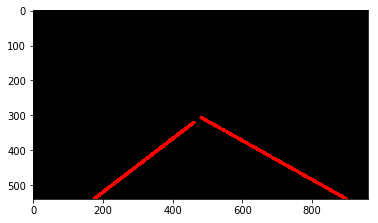

In [57]:
new_clip_output = 'test_output.mp4'
test_clip = VideoFileClip("/Users/vijayasarathibalasubramanian/Desktop/SDN/CarND-LaneLines-P1/solidWhiteRight.mp4")
#new_clip = test_clip.fl_image(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2YUV)) #NOTE: this function expects color images!!
new_clip = test_clip.fl_image(process_image)
%time new_clip.write_videofile(new_clip_output, audio=False)

In [58]:
HTML("""
<video width="640" height="300" controls>Solid
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output))

In [43]:
#Reflection : lesson should have covered indepth details instead of just covering basics. it took sometime for me to
#understand the project need and functions needed to implement.
#i didnt get much time to write the code in a robust way. may be we can improve the code to handle multiple images 
#and videos at the same. we can do fill the space with color.